At first, I'm going to parse tha data inside the .feather file to .csv because it will be easier to visualize and do necessary treatments.

In [9]:
import pandas as pd

# Importing the .feather file
sao_paulo_traffic_jams = pd.read_feather('./data/sao_paulo-traffic_jams.feather');

# Export data to a .txt file for better readability

sao_paulo_traffic_jams.to_csv('./data/sp_traffic_jams.csv', sep='\t', index=False) # tab separated
print("Data exported to .csv file")


Data exported to .csv file


Then, filtering the data to get the traffic jams from 2018 because it's the most recent we got. 

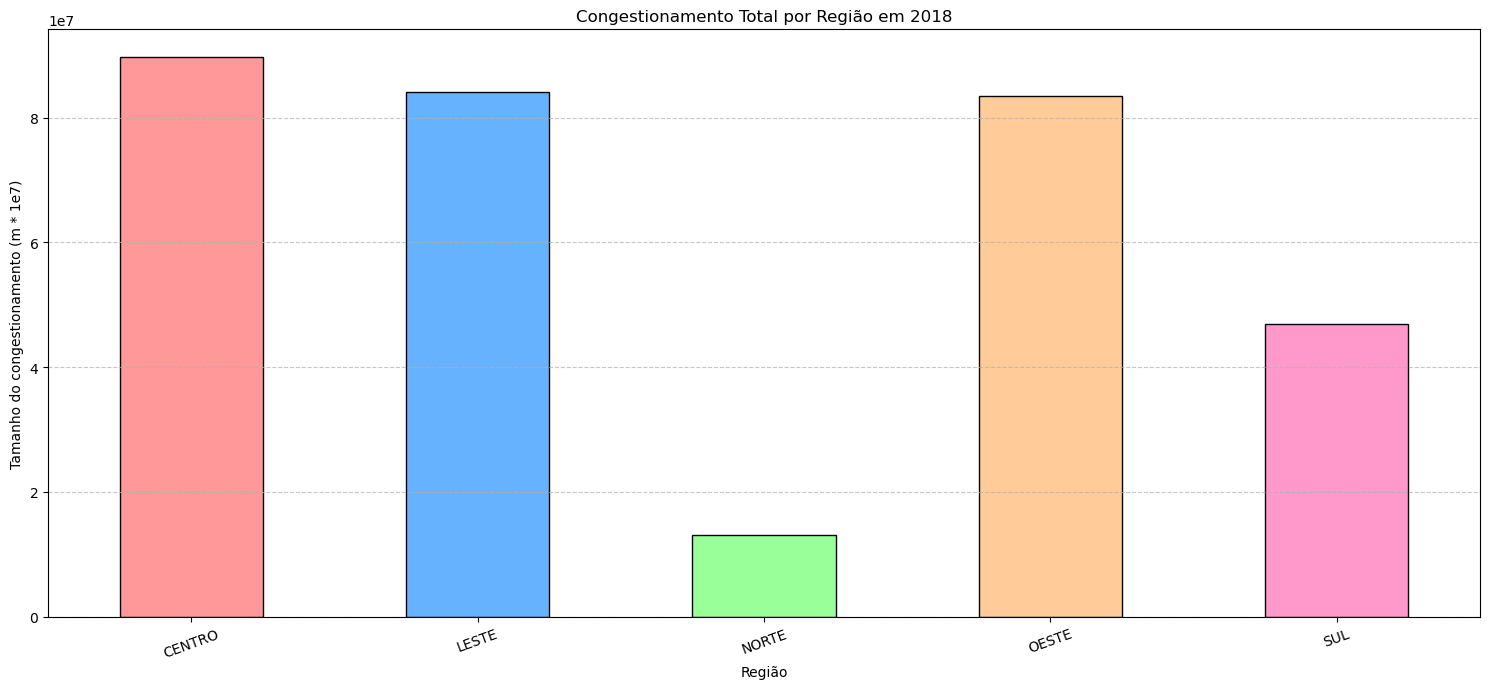

In [26]:
import matplotlib.pyplot as plt

# Filter data for the year 2018
sao_paulo_traffic_jams['timestamp'] = pd.to_datetime(sao_paulo_traffic_jams['timestamp'])
traffic_2018 = sao_paulo_traffic_jams[sao_paulo_traffic_jams['timestamp'].dt.year == 2018]

# Save the filtered data to a csv file
# traffic_2018.to_csv('./data/sp_traffic_jams_2018.csv', sep='\t', index=False)

# Group by region and calculate the total jam size
region_jam_size = traffic_2018.groupby('region')['jam_size'].sum()

# HEX codes for the bar's colors.
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#CC99FF', '#FFFF99']

# Plot the total jam size by region
plt.figure(figsize=(15, 7))
region_jam_size.plot(kind='bar', color=colors[:len(region_jam_size)], edgecolor='black')
plt.title('Congestionamento Total por Região em 2018')
plt.xlabel('Região')
plt.ylabel('Tamanho do congestionamento (m * 1e7)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see, the central zone is the one with more traffic jams.

Let's see if there are some relation with the number of traffic violations... 